<a href="https://colab.research.google.com/github/dhyannn/Deep-learning/blob/main/514_DLprog1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boolean function: AND


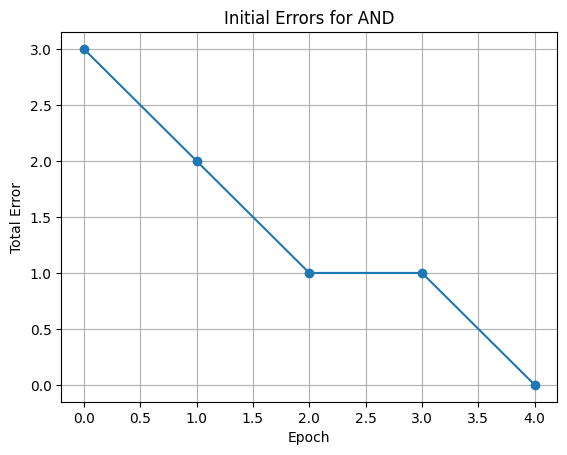

Initial weights:
Epoch 1: Error=3, Weights=[0.12154167 0.05048862 0.7034476 ]
Epoch 2: Error=2, Weights=[-0.07845833  0.05048862  0.6034476 ]
Epoch 3: Error=1, Weights=[-0.17845833  0.05048862  0.5034476 ]
Epoch 4: Error=1, Weights=[-0.27845833  0.05048862  0.4034476 ]
Epoch 5: Error=0, Weights=[-0.27845833  0.15048862  0.4034476 ]


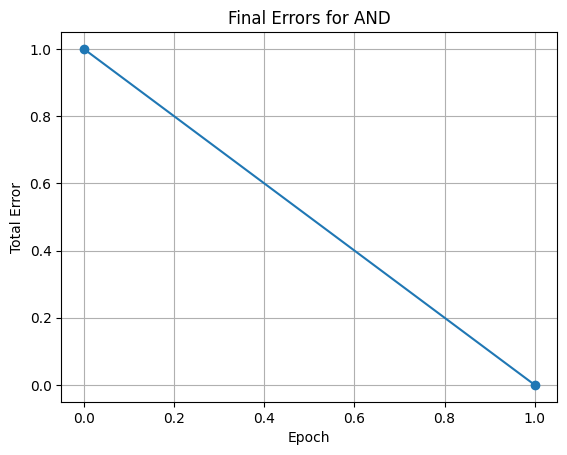

Final weights:
Epoch 6: Error=1, Weights=[-0.37845833  0.15048862  0.3034476 ]
Epoch 7: Error=0, Weights=[-0.37845833  0.15048862  0.3034476 ]

Boolean function: OR


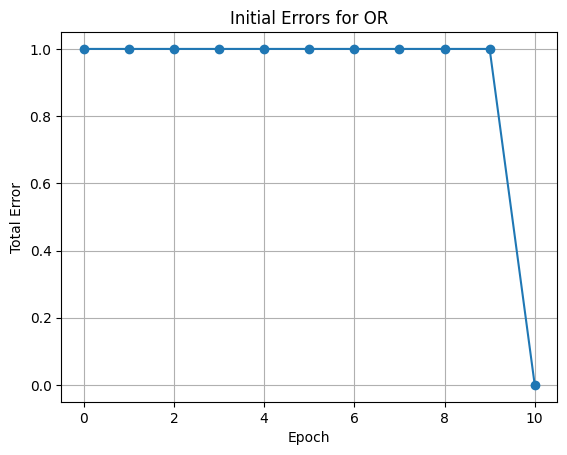

Initial weights:
Epoch 1: Error=1, Weights=[0.88046759 0.92128137 0.52777707]
Epoch 2: Error=1, Weights=[0.78046759 0.92128137 0.52777707]
Epoch 3: Error=1, Weights=[0.68046759 0.92128137 0.52777707]
Epoch 4: Error=1, Weights=[0.58046759 0.92128137 0.52777707]
Epoch 5: Error=1, Weights=[0.48046759 0.92128137 0.52777707]
Epoch 6: Error=1, Weights=[0.38046759 0.92128137 0.52777707]
Epoch 7: Error=1, Weights=[0.28046759 0.92128137 0.52777707]
Epoch 8: Error=1, Weights=[0.18046759 0.92128137 0.52777707]
Epoch 9: Error=1, Weights=[0.08046759 0.92128137 0.52777707]
Epoch 10: Error=1, Weights=[-0.01953241  0.92128137  0.52777707]
Epoch 11: Error=0, Weights=[-0.01953241  0.92128137  0.52777707]


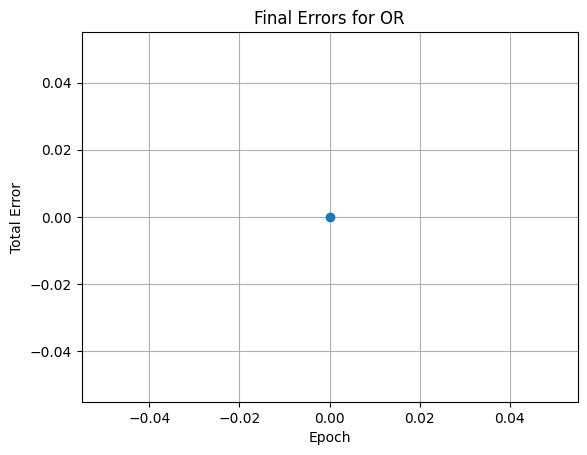

Final weights:
Epoch 12: Error=0, Weights=[-0.01953241  0.92128137  0.52777707]

Boolean function: NAND


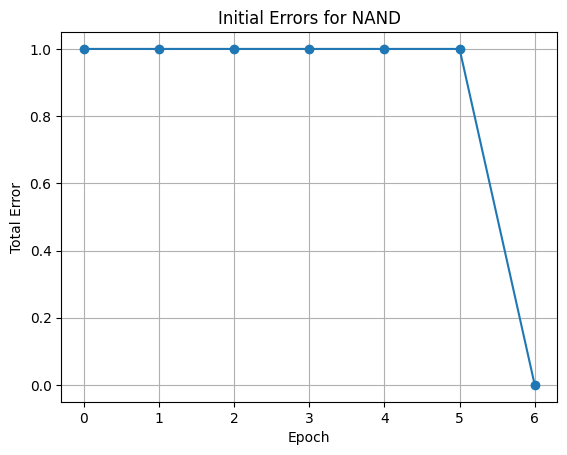

Initial weights:
Epoch 1: Error=1, Weights=[0.56139079 0.26380852 0.49687878]
Epoch 2: Error=1, Weights=[0.46139079 0.16380852 0.39687878]
Epoch 3: Error=1, Weights=[0.36139079 0.06380852 0.29687878]
Epoch 4: Error=1, Weights=[ 0.26139079 -0.03619148  0.19687878]
Epoch 5: Error=1, Weights=[ 0.16139079 -0.13619148  0.09687878]
Epoch 6: Error=1, Weights=[ 0.06139079 -0.23619148 -0.00312122]
Epoch 7: Error=0, Weights=[ 0.06139079 -0.23619148 -0.10312122]


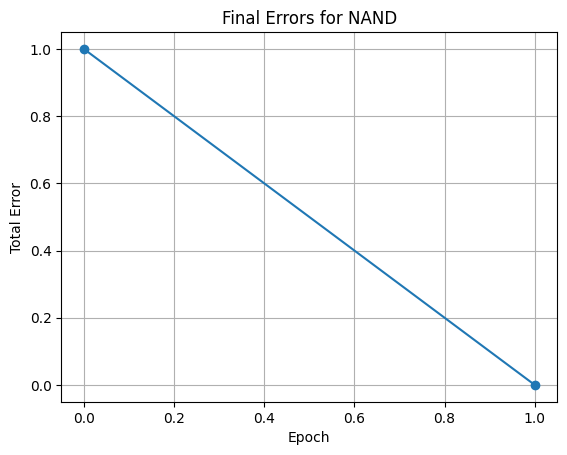

Final weights:
Epoch 8: Error=1, Weights=[ 0.16139079 -0.23619148 -0.10312122]
Epoch 9: Error=0, Weights=[ 0.16139079 -0.23619148 -0.20312122]

Boolean function: XOR


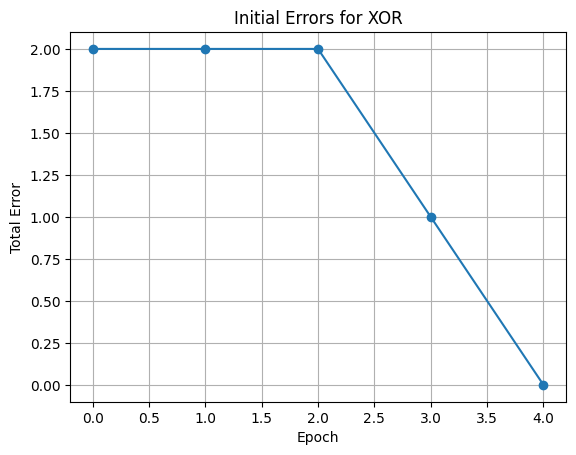

Initial weights:
Epoch 1: Error=2, Weights=[0.37215758 0.78780722 0.25029994]
Epoch 2: Error=2, Weights=[0.17215758 0.68780722 0.15029994]
Epoch 3: Error=2, Weights=[-0.02784242  0.58780722  0.05029994]
Epoch 4: Error=1, Weights=[-0.12784242  0.48780722 -0.04970006]
Epoch 5: Error=0, Weights=[-0.12784242  0.38780722 -0.04970006]


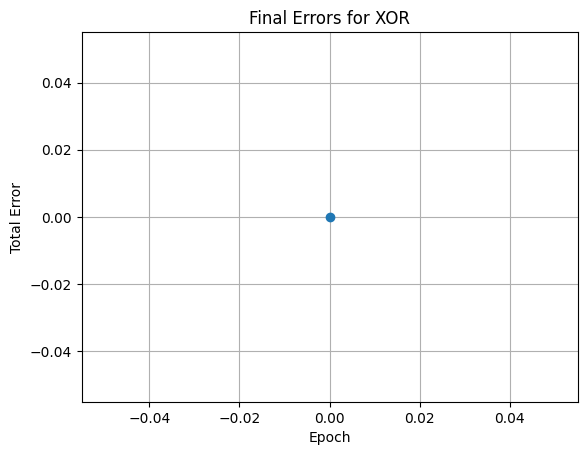

Final weights:
Epoch 6: Error=0, Weights=[-0.12784242  0.28780722 -0.04970006]



In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # x*w + b
        return self.activation(summation)

    def train(self, training_inputs, labels):
        errors = []
        weights_history = []
        for _ in range(self.epochs):
            total_error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                total_error += error
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            errors.append(abs(total_error))
            weights_history.append(np.copy(self.weights))
            if total_error == 0:
                break
        return errors, weights_history

def visualize(errors, title):
    plt.plot(range(len(errors)), errors, marker='o')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Total Error')
    plt.grid(True)
    plt.show()

def main():
    boolean_functions = {
        "AND": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 0, 0, 1])),
        "OR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 1])),
        "NAND": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([1, 1, 1, 0])),
        "XOR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0]))
    }

    for function, (inputs, labels) in boolean_functions.items():
        print(f"Boolean function: {function}")
        perceptron = Perceptron(input_size=2)
        initial_errors, initial_weights = perceptron.train(inputs, labels)
        visualize(initial_errors, f"Initial Errors for {function}")

        print("Initial weights:")
        for i, weights in enumerate(initial_weights):
            print(f"Epoch {i+1}: Error={initial_errors[i]}, Weights={weights}")

        final_errors, final_weights = perceptron.train(inputs, labels)
        visualize(final_errors, f"Final Errors for {function}")

        print("Final weights:")
        for i, weights in enumerate(final_weights):
            print(f"Epoch {len(initial_weights) + i + 1}: Error={final_errors[i]}, Weights={weights}")
        print()

if __name__ == "__main__":
    main()


Develop a Python script to utilize the gradient descent algorithm for locating the global minima
of the following equations.

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
def f(x):
    return x**2 - 2*x + 2

In [11]:
def gradient_descent(f, initial_x, learning_rate=0.1, threshold=1e-5):
    x = initial_x
    iterations = 0
    while True:
        gradient = 2 * x - 2
        new_x = x - learning_rate * gradient
        if abs(new_x - x) < threshold:
            break
        x = new_x
        iterations += 1
    return x, iterations

In [12]:
# Minimization for f(x) = x^2 - 2x + 2
min_x, iterations = gradient_descent(f, initial_x=0)
print("Minimum for f(x) = x^2 - 2x + 2:", min_x)
print("Iterations:", iterations)

Minimum for f(x) = x^2 - 2x + 2: 0.9999564438570341
Iterations: 45


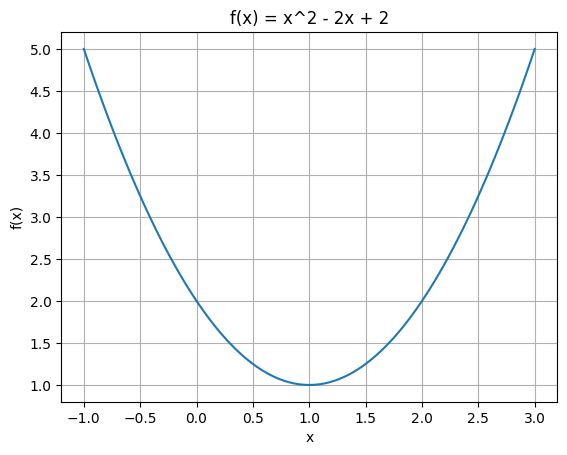

In [13]:
# Plotting f(x) = x^2 - 2x + 2
x_values = np.linspace(-1, 3, 100)
plt.plot(x_values, f(x_values))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = x^2 - 2x + 2')
plt.grid(True)
plt.show()